# A data-driven approach to predict the success of bank telemarketing.

## Problem Statement :

##### The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:

- #####  Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
- #####  Present the financial benefit of this project to the marketing team

The following Python Code describes and analyses the dataset 'bank-additional-full.csv' to give solutions of the mentioned problem statement.

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [196]:
data=pd.read_csv("E:/Assignment/bank-additional/bank-additional-full.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

- There are no missing values in the Data Set. Also, initially being a semi-colon seperated data, the data has been delimited to comma seperated values using Microsoft Excel before analysis

In [197]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [198]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [199]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### Only 11.2% (4640 out of 41188) clients accepted to open a term deposit. Hence this data set is unbalanced.

## Clustering Features into Numeric, Categorical and Outcome Features

In [200]:
numeric_features=['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features=[i for i in data.columns if i not in numeric_features]
categorical_features.remove('y')
outcome='y'
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## Exploratory Data Analysis :

### Correlation Matrix

In [201]:
for feature in categorical_features:
    data[feature]=data[feature].astype('category')
    

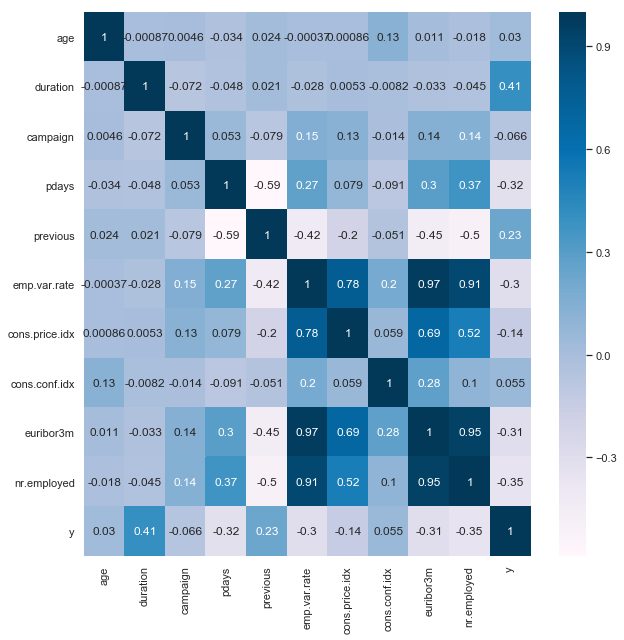

In [202]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
data['y']= encoder.fit_transform(data['y'])

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='PuBu',fmt='.2g',annot=True)  

- emp.var.rate(Employment Variation Rate) has high correlations with euribor3m(Euribor 3 months rate) , nr.employed(Number of Employees) and cons.price.idx(Consumer Price Index).
- We can ignore 'nr.employed' and consider 'euribor3m' to avoid the redundancy of information.

### Violin Plots

C:\Users\Asmit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


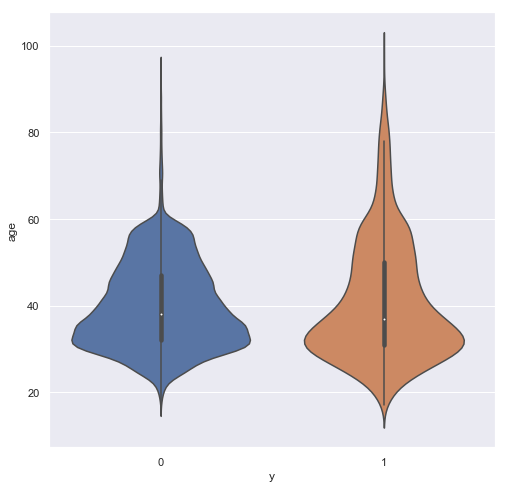

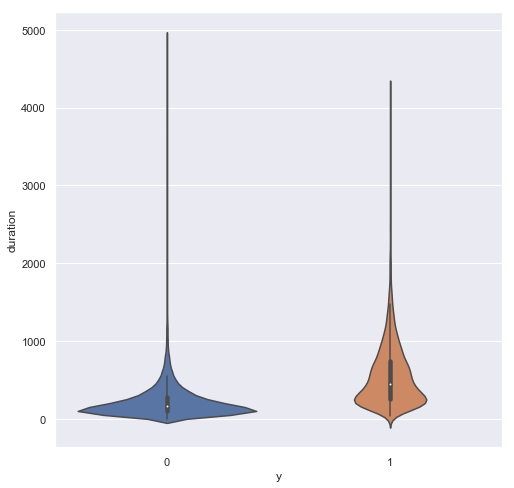

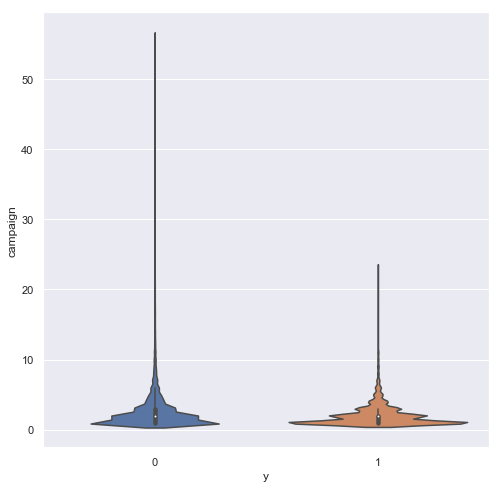

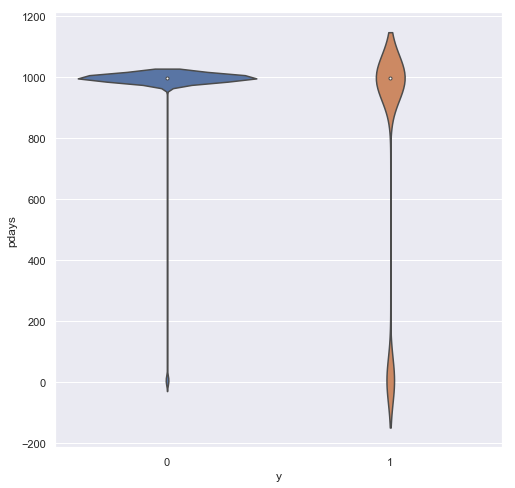

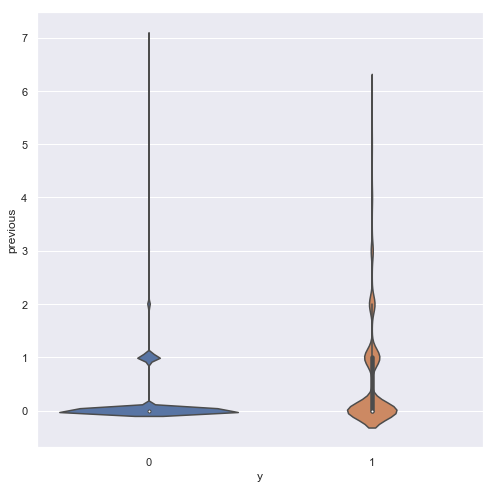

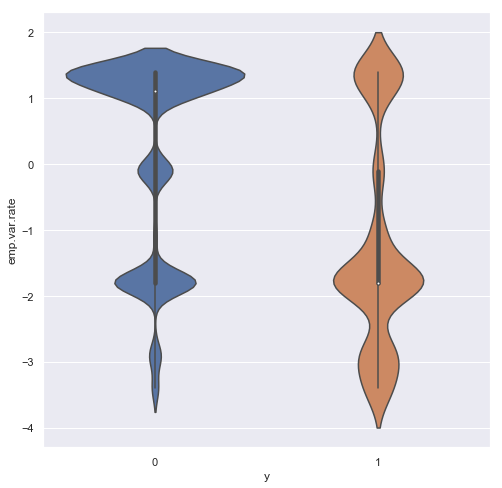

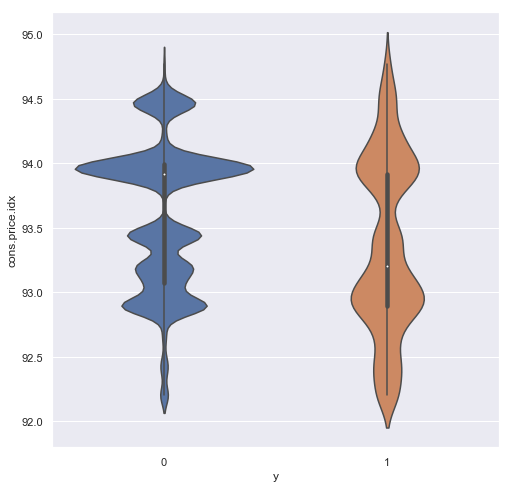

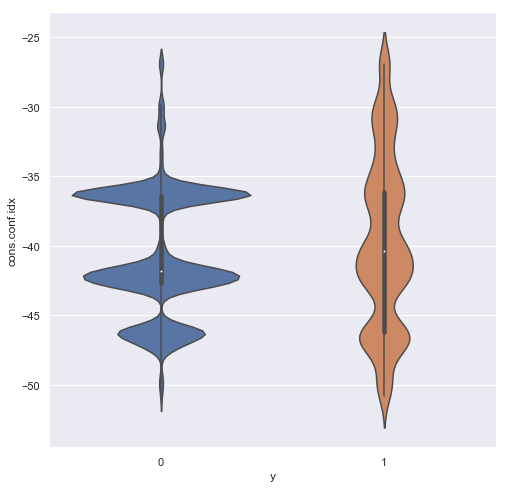

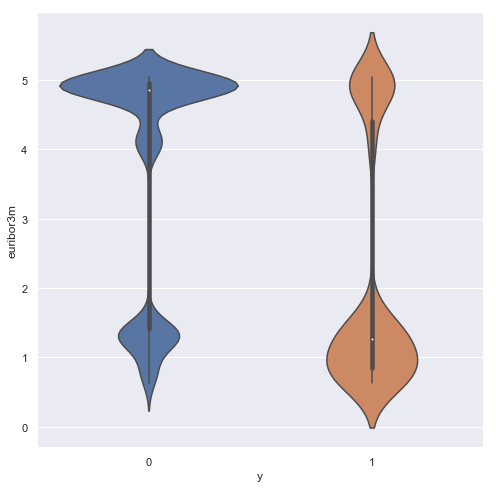

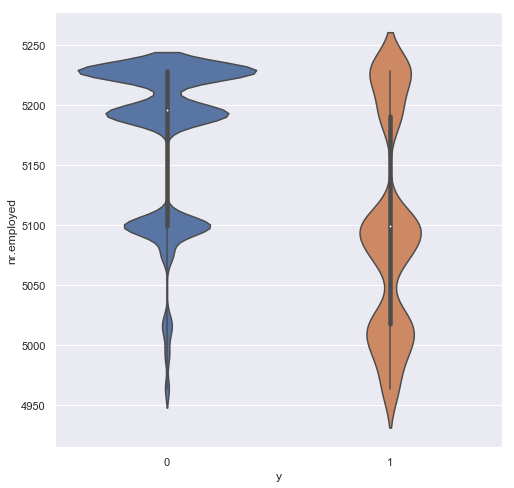

In [203]:
% matplotlib inline
for feature in numeric_features:
    plt.figure(figsize=(8,8))
    sns.violinplot(outcome,feature,data=data)
    plt.show()

### Histograms

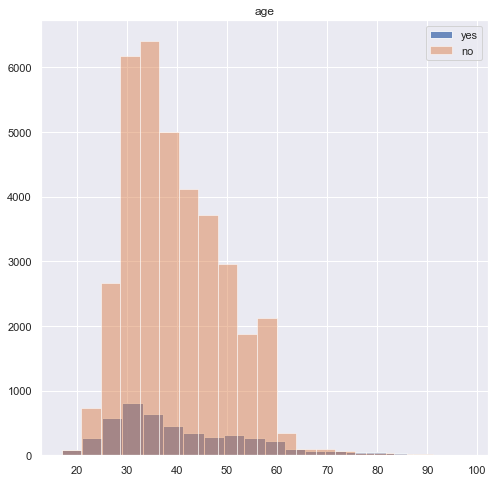

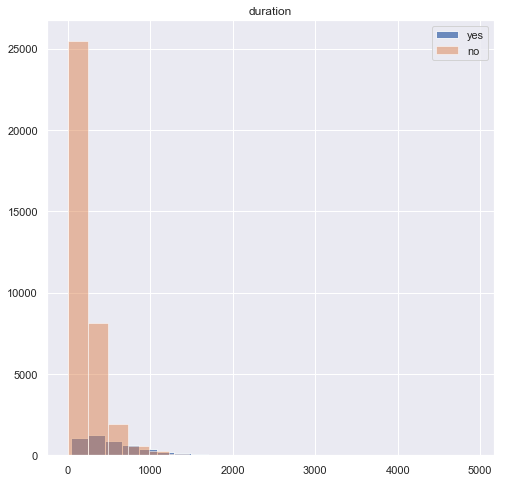

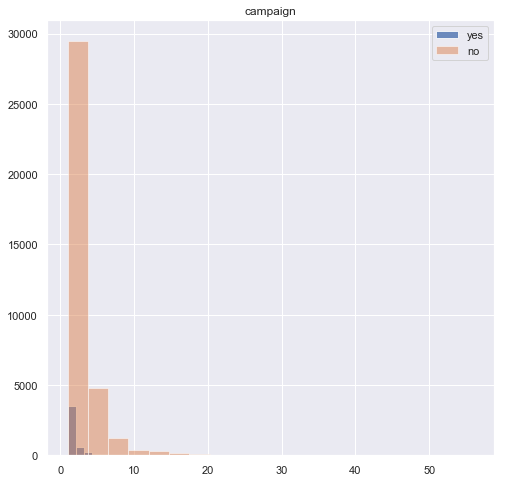

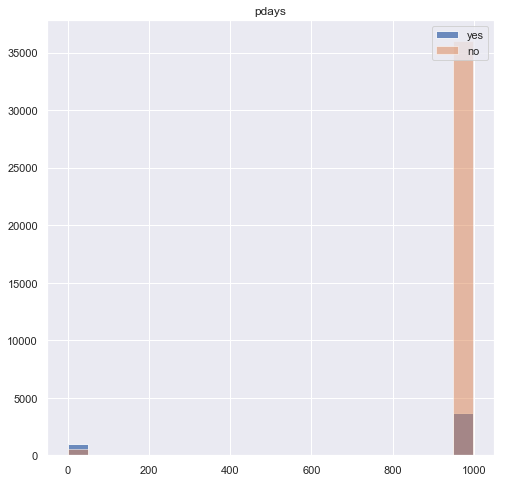

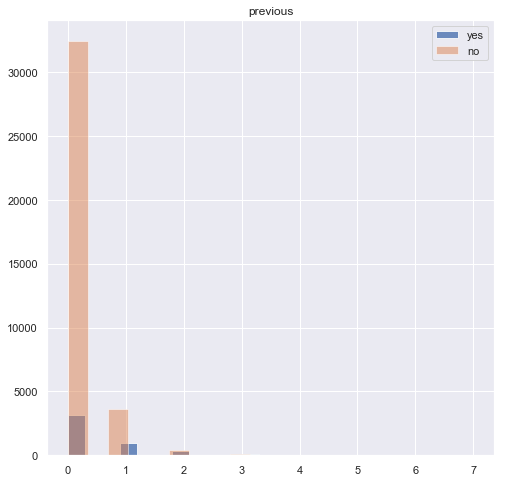

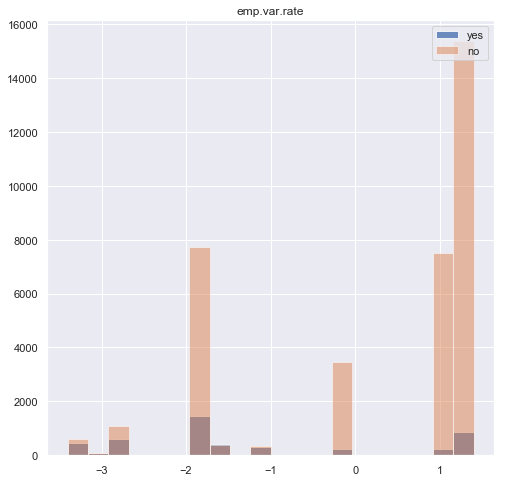

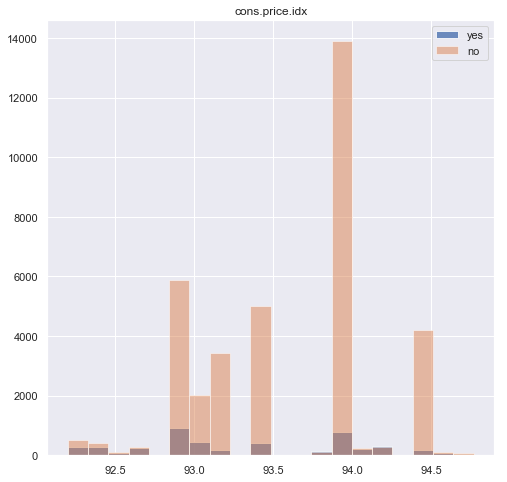

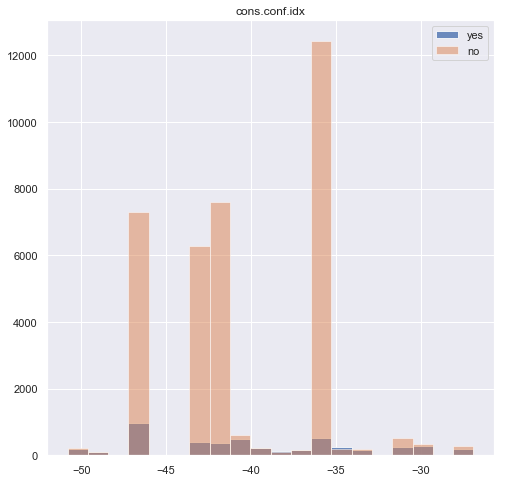

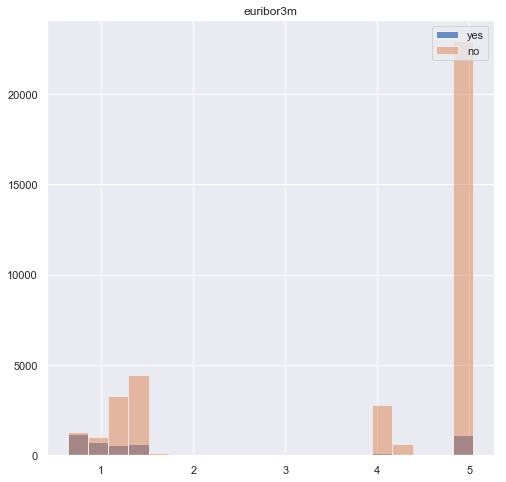

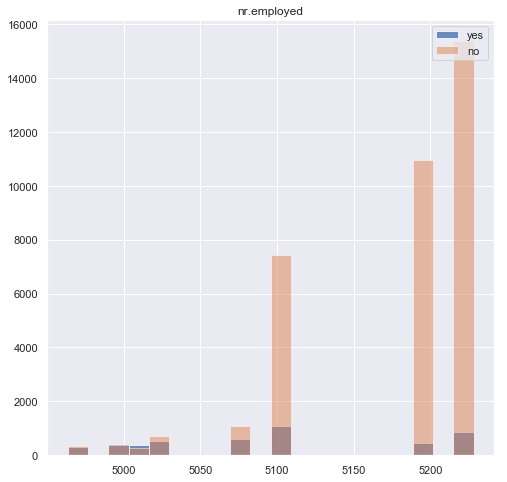

In [204]:
% matplotlib inline
bins=20
for i in numeric_features:
    plt.figure(figsize=(8,8))
    plt.hist(data[data["y"]==1][i].values, bins, alpha=0.8, label='yes', )
    plt.hist(data[data["y"]==0][i].values, bins, alpha=0.5, label='no')
    plt.legend(loc='upper right')
    plt.title(str(i))
    plt.show()

- It is quite clear that 'age' can be eliminated as an important feature as its distribution is identical for both success and failure.

- Also, 'duration' feature can be eliminated as this feature will only be useful if the client recieves a call(outbound) or calls(inbound). Moreover, 'duration' will have a very high correlation with the client's opening a term deposit as the longer the duration is, the higher is the probability of client opening a term deposit in the bank. Thus, due to a high correlation, it will restrict learning models to assign proper weights to other important features.

- 'pdays' can be ignored as most of clients have not been contacted.
- 'campaign' can be ignored as it does not provide any relevant information about a specific client.

## Data distribution of Categorical features

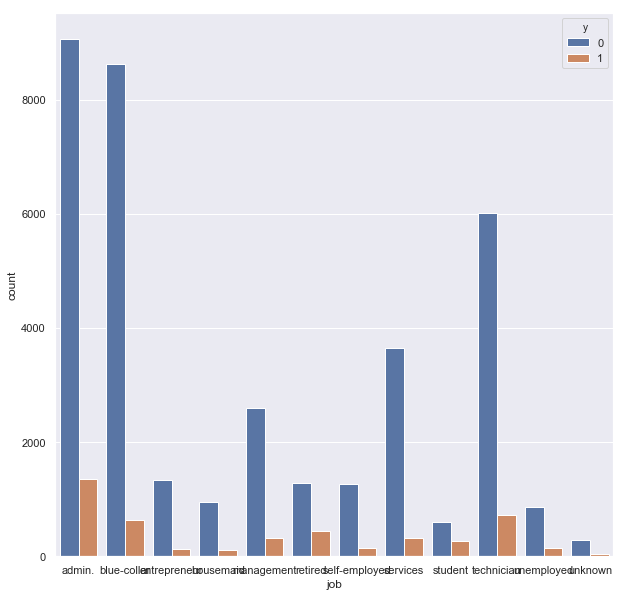

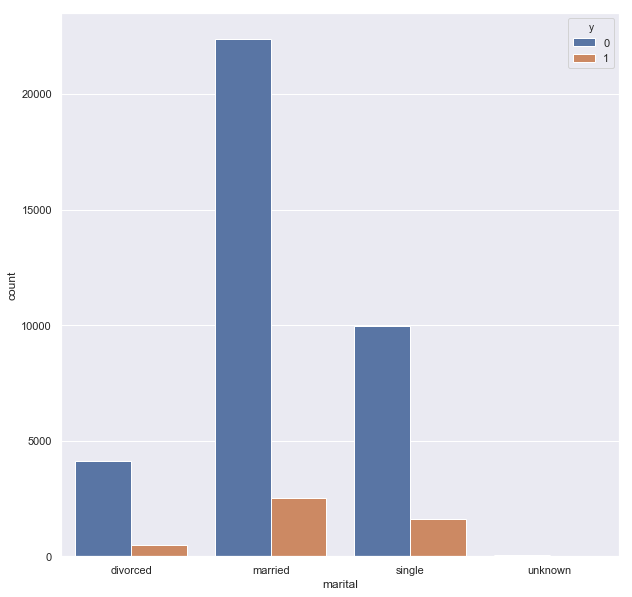

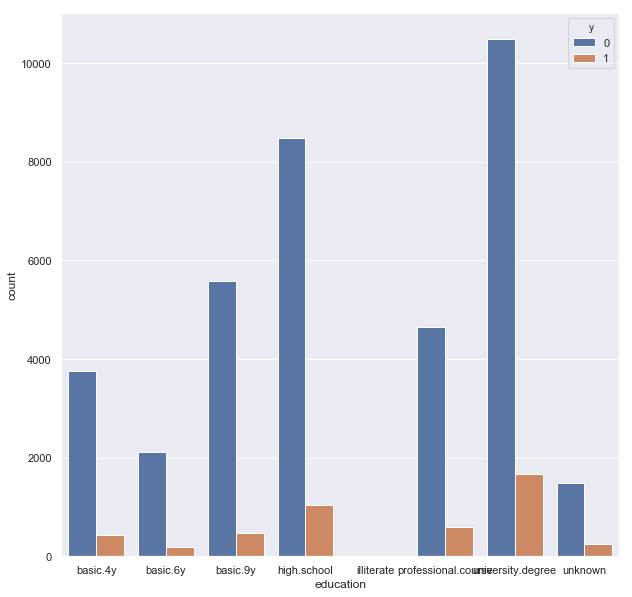

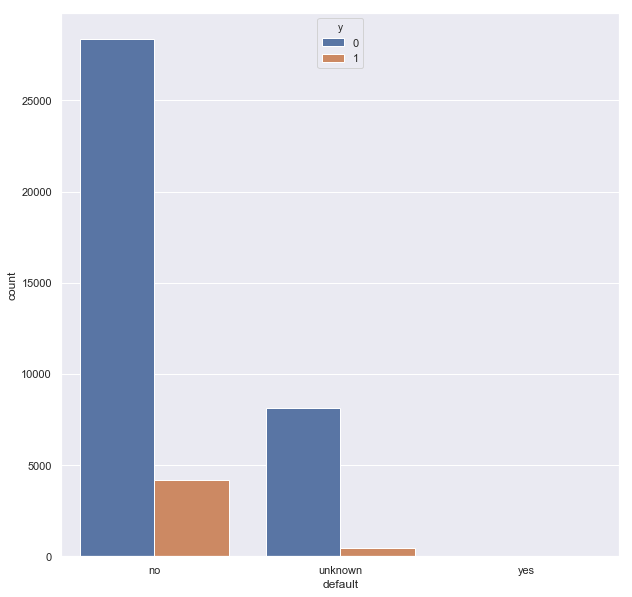

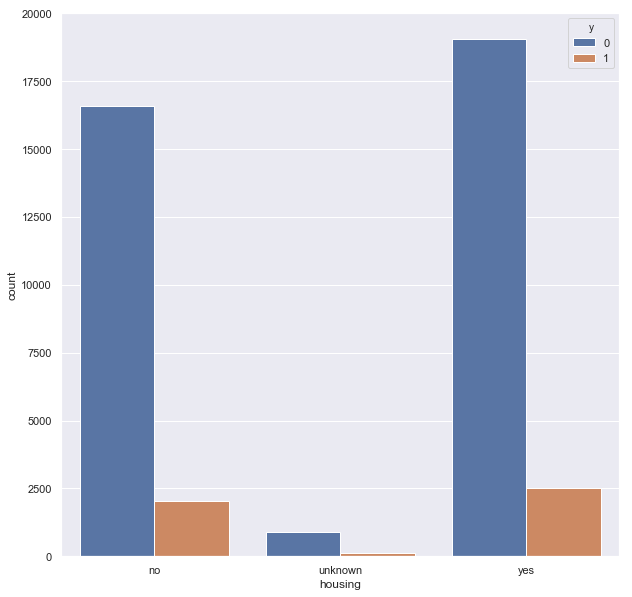

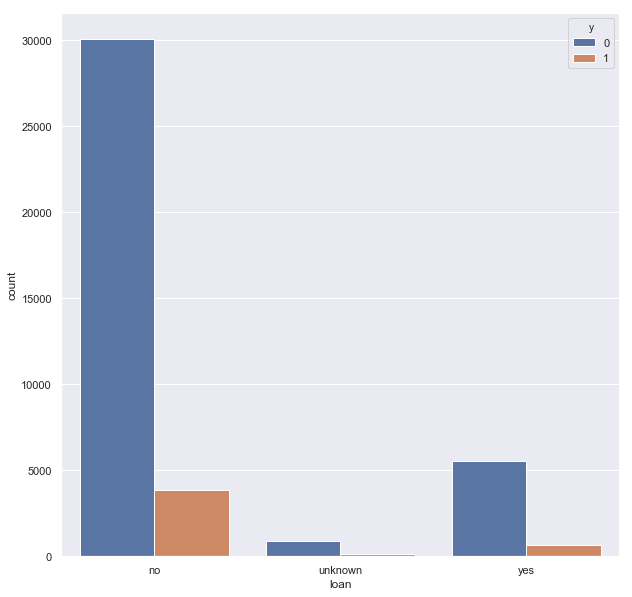

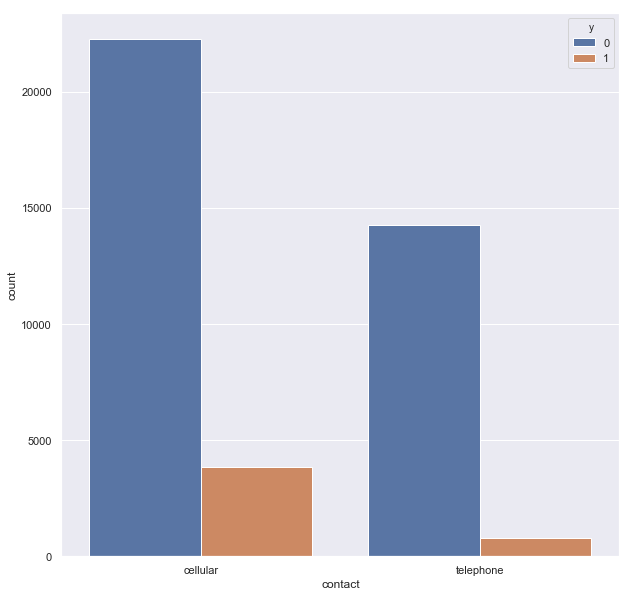

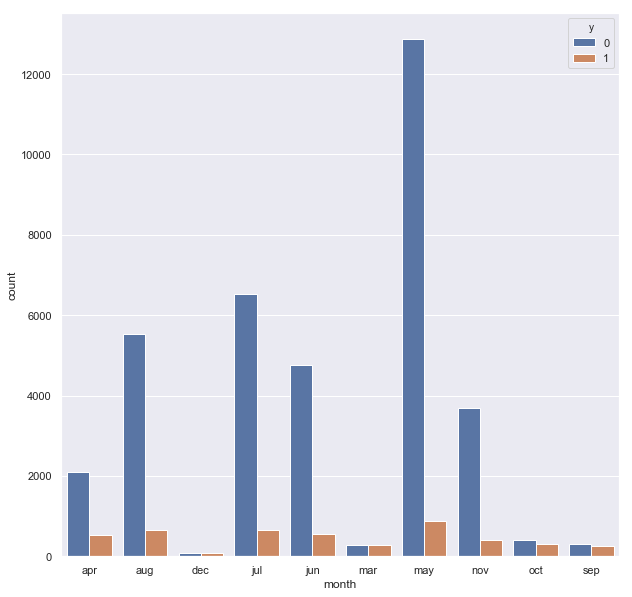

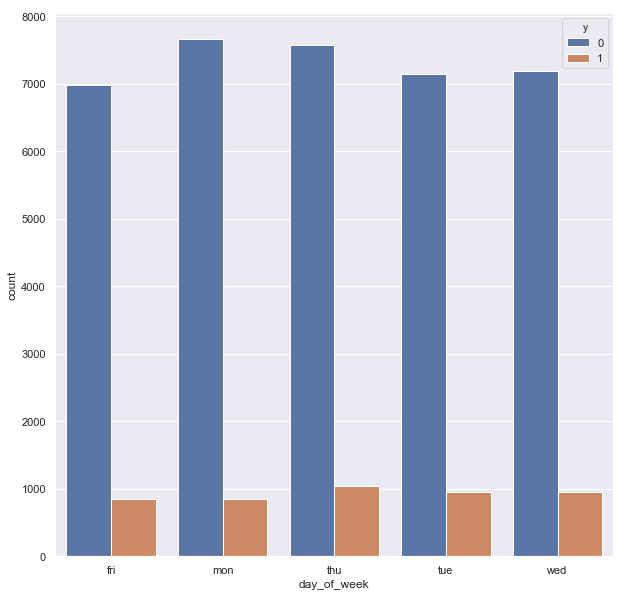

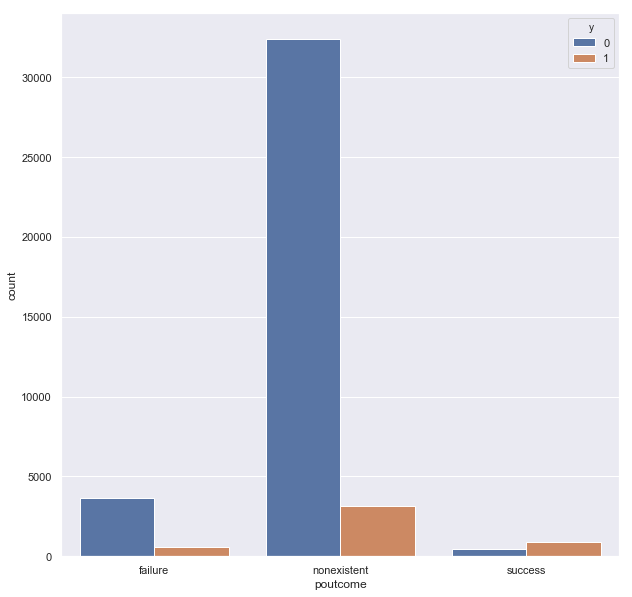

In [205]:
for feature in categorical_features:
    plt.figure(figsize=(10,10))
    sns.countplot(feature, hue=outcome, data=data )
    plt.show()

- 'day_of_week' can be ignored as distribution is similar for all the working days.

## Encoding categorical data into numerical values

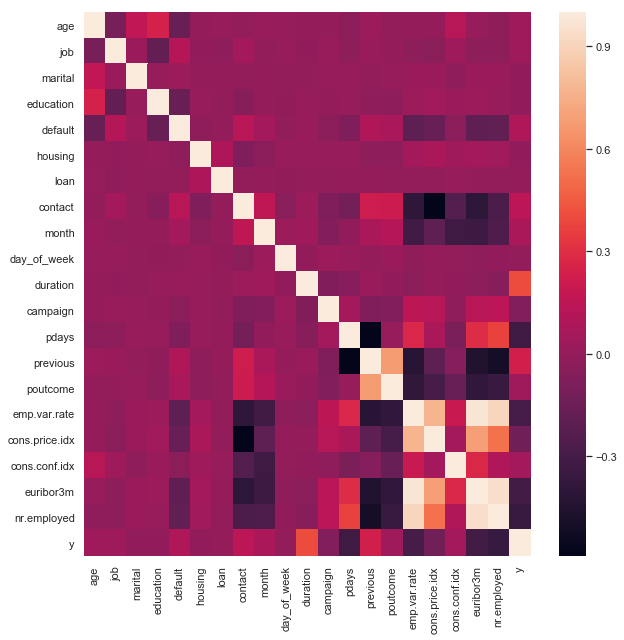

In [206]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoded_data = data.copy()
for column in categorical_features :
    encoder = LabelEncoder()
    encoded_data[column]= encoder.fit_transform(data[column]) 
    o= OneHotEncoder()
    arr= encoded_data[column].values
    arr=arr.reshape(-1,1)
    encoded_data[column]=o.fit_transform(arr).toarray()
    
plt.figure(figsize=(10,10));
sns.heatmap(encoded_data.corr());  # cmap='PuBu'
plt.show()

## Feature Elimination using RFE ( cross-validation of EDA insights )

In [208]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
array = encoded_data.values
X = array[:,0:20]
Y = array[:,20]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X, Y)
print("Num Features: " ,fit.n_features_) 
print("Selected Features: " ,fit.support_)
print("Feature Ranking: " ,fit.ranking_)

Num Features:  15
Selected Features:  [False  True False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True False]
Feature Ranking:  [5 1 4 1 1 1 1 1 1 1 3 1 6 1 1 1 1 1 1 2]


Based on EDA insights and RFE, the following features are removed from the data set :
- 'age'
- 'days_of_week'
- 'pdays'
- 'nr.employed'

In [209]:
removed_features = ['age','pdays','nr.employed','days_of_week']
imp_features=[i for i in encoded_data.columns if i not in removed_features]
final_data=encoded_data[imp_features]
final_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,261,1,0,0.0,1.1,93.994,-36.4,4.857,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,149,1,0,0.0,1.1,93.994,-36.4,4.857,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,226,1,0,0.0,1.1,93.994,-36.4,4.857,0
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,151,1,0,0.0,1.1,93.994,-36.4,4.857,0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,307,1,0,0.0,1.1,93.994,-36.4,4.857,0


## Training and Testing Split

The dataset is split into training and testing sets, and training set is 88% of the entire dataset so as to account for data being unbalanced.

In [210]:
from sklearn.model_selection import train_test_split
array= final_data.values
indep = array[:,:-1]
dep = array[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(indep,dep, test_size= 0.12, random_state=0)

## Feature Scaling

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models :

### 1. Logistic Regression :

In [212]:
model=LogisticRegression()
model.fit(X_train, Y_train)   

model.score(X_train, Y_train)

0.9087322389295075

In [213]:
Y_predict= model.predict(X_test)

accuracy=model.score(X_test, Y_test)    
print("Accuracy:",accuracy)   

Accuracy: 0.9117944568076067


### 2. Decision Tree :

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
clf.score(X_train, Y_train)

0.9997516898882605

In [215]:
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.886910782925349


### 3. Neural Networks :

In [216]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1)
clf.fit(X_train, Y_train)
clf.score(X_train,Y_train)

0.9140847013381156

In [217]:
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9176613392676513


### 4. Random Forest ( Oversampling using SMOTE ) :

In [218]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

In [219]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, Y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [220]:
print('Validation Results')
print(clf_rf.score(X_test, Y_test))

Validation Results
0.9002629981792434


### Accuracy :

- Logistic Regression : 0.9117
- Decision Tree : 0.8863
- Neural Networks ( MLP Classifier ) : 0.9176
- Random Forest ( Oversampling using SMOTE ) : 0.9002

# Conclusions :

- 16 out of 20 features were used for analysis and training of models.
- Neural Networks(MLP Classifier) proved to be the best suited model for the given unbalanced dataset, with an accuracy score of 0.9176 
- Thus by using MLP Classifier, we can make better prediction for the next telemarketing and maximise the number of clients opening term deposits in minimal cost and efforts.

Note : There is always an scope of improvement by using more complex machine learning algorithms.

# Financial Benefits :

A data-driven approach to predict the success of bank telemarketing can prove to be beneficial for the bank. Apart from the cost reduction by not having to hire a devoted sales-force, intelligent use of data can have following financial benefits :

- Opportunity Cost Reduction : The use of data analytics and machine learning algorithms enables a more efficient targeted marketing, thus there is a significant reduction in Opportunity cost as less time and efforts are needed to produce similar or better results.


- Better Understanding of Customer Behaviour : Analysing the data and extracting valuable insights can reveal a lot of information about the client's behavior, thus banks can adapt accordingly and work towards improving client's satisfaction. This will help the bank in a long-run.